# Students:
Liav Ermias - 211684956
Ori Barel - 207813007
Ron Elyashar - 209350644

#  Section 1: Mounting Google Drive and Accessing Files
This section mounts Google Drive and prepares file paths for accessing the dataset stored there.

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

drive_root = "/content/drive/My Drive"
print("Available files in Google Drive root:")
print(os.listdir(drive_root))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Available files in Google Drive root:
['itin(J78C23_BAREL_ORIMR).html', '45728d44-6b80-4745-bc1a-e33c2c872a6b.jpg', '38643151-0-- (1).pdf', '38643151-0--.pdf', '×ª×\xa0×_×__×ª×©×_×_×__×©×_×¨_×_×_×_×_×__×_×§×_×_.pdf', 'IMG_5214.JPG', 'Image.jpeg', 'אורי בראל קורות חיים 2020.doc', 'סודות המוכרים המובילים באמזון.gdoc', 'לוח שידורים ושיבוצים יורו 2020.gsheet', 'CW_Employee_Data (1).rar', 'CW_Employee_Data.rar', 'IMG_6558 (1).JPG', 'IMG_6558.JPG', 'IMG_6559.JPG', 'IMG_6560 (1).JPG', 'IMG_6560.JPG', 'IMG_6561.JPG', 'IMG_6562.JPG', 'IMG_6563.JPG', 'IMG_6564.JPG', 'IMG_6566.JPG', 'IMG_6567.JPG', 'IMG_6568.JPG', 'IMG_6569.JPG', 'IMG_6570.JPG', 'IMG_6571.JPG', 'IMG_6572.JPG', 'IMG_6573.JPG', 'IMG_6574.JPG', 'IMG_6575.JPG', 'IMG_6576.JPG', 'IMG_6577.JPG', 'IMG_6578.JPG', 'IMG_6579.JPG', 'IMG_6580.JPG', 'IMG_6581.JPG', 'IMG_6582.JPG', 'IMG_6583.JPG', 'IMG_6584.JPG', 'IMG

#  Section 2: Extracting and Cleaning the Dataset
We extract the dataset ZIP and remove unnecessary dummy TFRecords.

In [ ]:
import shutil
import zipfile

zip_drive_path = "/content/drive/My Drive/cars196_dataset.zip"

extract_path = "/content/cars_196"

if os.path.exists(zip_drive_path):
    print(f"Copying ZIP file from Drive to Colab...")
    shutil.copy(zip_drive_path, "/content/cars196_dataset.zip")
    zip_path = "/content/cars196_dataset.zip"
else:
    zip_path = "/content/cars196_dataset.zip"

if os.path.exists(zip_path):
    print(f"Extracting {zip_path} to {extract_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction complete.")
else:
    print("Error: ZIP file not found in Drive or Colab. Check the path.")


Copying ZIP file from Drive to Colab...
Extracting /content/cars196_dataset.zip to /content/cars_196...
Extraction complete.


In [ ]:
from glob import glob
import os

base_dir = "/content/cars_196"
all_dirs = os.listdir(base_dir)

# Find the dataset directory
dataset_dir = None
for d in all_dirs:
    if "dataset_cars" in d:
        dataset_dir = os.path.join(base_dir, d)
        break

if dataset_dir and os.path.exists(dataset_dir):
    print(f" Found dataset directory: {dataset_dir}")
else:
    print(f" Dataset directory NOT found in: {base_dir}. Check manually.")

# Search for TFRecord files
train_tfrecords = sorted(glob(os.path.join(dataset_dir, "train", "*.tfrecord*")))
test_tfrecords = sorted(glob(os.path.join(dataset_dir, "test", "*.tfrecord*")))

print(" Train TFRecord files:")
print(train_tfrecords[:3])

print("\n Test TFRecord files:")
print(test_tfrecords[:3])

if not train_tfrecords:
    print(" No train TFRecord files found.")
if not test_tfrecords:
    print(" No test TFRecord files found.")


 Found dataset directory: /content/cars_196/‏‏dataset_cars - עותק
 Train TFRecord files:
['/content/cars_196/\u200f\u200fdataset_cars - עותק/train/cars196-train.tfrecord-00000-of-00008', '/content/cars_196/\u200f\u200fdataset_cars - עותק/train/cars196-train.tfrecord-00001-of-00008', '/content/cars_196/\u200f\u200fdataset_cars - עותק/train/cars196-train.tfrecord-00002-of-00008']

 Test TFRecord files:
['/content/cars_196/\u200f\u200fdataset_cars - עותק/test/cars196-test.tfrecord-00000-of-00008', '/content/cars_196/\u200f\u200fdataset_cars - עותק/test/cars196-test.tfrecord-00001-of-00008', '/content/cars_196/\u200f\u200fdataset_cars - עותק/test/cars196-test.tfrecord-00002-of-00008']


In [ ]:
import os

dummy_path = os.path.join(dataset_dir, "train", "dummy.tfrecord")
if os.path.exists(dummy_path):
    os.remove(dummy_path)
    print(f"Removed dummy file: {dummy_path}")
else:
    print("No dummy.tfrecord file found.")


Removed dummy file: /content/cars_196/‏‏dataset_cars - עותק/train/dummy.tfrecord


In [ ]:
train_tfrecords = [f for f in train_tfrecords if "dummy" not in os.path.basename(f).lower()]


In [ ]:
print("Filtered train TFRecords:")
for f in train_tfrecords:
    print("✅", f)

Filtered train TFRecords:
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00000-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00001-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00002-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00003-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00004-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00005-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00006-of-00008
✅ /content/cars_196/‏‏dataset_cars - עותק/train/cars196-train.tfrecord-00007-of-00008


#  Section 3: Parsing TFRecords and Loading Data
TFRecords are parsed using TensorFlow to extract images and labels.

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

def parse_tfrecord(example_proto):
    feature_description = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'label': tf.io.FixedLenFeature([], tf.int64),
    }
    parsed_example = tf.io.parse_single_example(example_proto, feature_description)
    image = tf.io.decode_jpeg(parsed_example['image'], channels=3)
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.uint8)
    return image.numpy(), parsed_example['label'].numpy()


def load_tfrecord_images_and_labels(tfrecord_files):
    images, labels = [], []
    raw_dataset = tf.data.TFRecordDataset(tfrecord_files)

    for raw_record in raw_dataset:
        try:
            image, label = parse_tfrecord(raw_record)
            images.append(Image.fromarray(image))
            labels.append(label)
        except Exception as e:
            print(f" Skipped one record due to error: {e}")
            continue

    return images, labels



In [ ]:
train_images, train_labels = load_tfrecord_images_and_labels(train_tfrecords)
test_images, test_labels = load_tfrecord_images_and_labels(test_tfrecords)

#  Section 4: Preprocessing and Splitting Data
Data is transformed using standard ImageNet normalization, and split into train/validation/test.

In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np

# Heavy augmentation for training set
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.6, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(degrees=25),
    transforms.ColorJitter(brightness=0.3, contrast=0.3,
                           saturation=0.3, hue=0.1),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Basic transform for validation and test (no augmentation)
basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Custom PyTorch Dataset
class CarsDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = self.labels[idx]

        if isinstance(img, np.ndarray):
            img = Image.fromarray(img)
        elif isinstance(img, torch.Tensor):
            img = transforms.ToPILImage()(img)

        if self.transform:
            img = self.transform(img)

        return img, label



In [ ]:
# Split into train and val
train_imgs, val_imgs, train_lbls, val_lbls = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

# Creating the datasets with transformations
train_dataset = CarsDataset(train_imgs, train_lbls, transform=train_transform)
val_dataset   = CarsDataset(val_imgs, val_lbls, transform=basic_transform)
test_dataset  = CarsDataset(test_images, test_labels, transform=basic_transform)


In [ ]:
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"✅ Data ready with on-the-fly augmentation - Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")


✅ Data ready with on-the-fly augmentation - Train: 6515, Val: 1629, Test: 8041


#  Section 5: Initial Model Setup – ResNet50
We load the pretrained ResNet50 model and prepare it for experimentation.

In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn

# Check device (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Load pretrained ResNet50
model = models.resnet50(pretrained=True)

# Freeze all pre-trained layers
for param in model.parameters():
    param.requires_grad = False

# Replace only the last layer for classification
num_classes = 196  # Cars196 dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to GPU
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.fc.parameters(), lr=0.001)

print("✅ Model ready with simple configuration ")


Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Model ready with simple configuration 


In [ ]:
import torch
import torchvision.models as models

# Load pretrained ResNet50
model = models.resnet50(pretrained=True)

# Print layers in desired format
for name, layer in model.named_modules():
    print(f"<{layer.__class__.__name__} name={name}, built=True>")



<ResNet name=, built=True>
<Conv2d name=conv1, built=True>
<BatchNorm2d name=bn1, built=True>
<ReLU name=relu, built=True>
<MaxPool2d name=maxpool, built=True>
<Sequential name=layer1, built=True>
<Bottleneck name=layer1.0, built=True>
<Conv2d name=layer1.0.conv1, built=True>
<BatchNorm2d name=layer1.0.bn1, built=True>
<Conv2d name=layer1.0.conv2, built=True>
<BatchNorm2d name=layer1.0.bn2, built=True>
<Conv2d name=layer1.0.conv3, built=True>
<BatchNorm2d name=layer1.0.bn3, built=True>
<ReLU name=layer1.0.relu, built=True>
<Sequential name=layer1.0.downsample, built=True>
<Conv2d name=layer1.0.downsample.0, built=True>
<BatchNorm2d name=layer1.0.downsample.1, built=True>
<Bottleneck name=layer1.1, built=True>
<Conv2d name=layer1.1.conv1, built=True>
<BatchNorm2d name=layer1.1.bn1, built=True>
<Conv2d name=layer1.1.conv2, built=True>
<BatchNorm2d name=layer1.1.bn2, built=True>
<Conv2d name=layer1.1.conv3, built=True>
<BatchNorm2d name=layer1.1.bn3, built=True>
<ReLU name=layer1.1.relu, 

#  Section 6: Training Utilities
Functions for training and validation are defined.

In [ ]:
def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc


def validate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc


##  Experiment 1: Train Only the FC Layer (All Other Layers Frozen)
In this experiment, we freeze all layers of ResNet50 and train only the final classification layer. This is a standard transfer learning approach.

**Parameters:**
- Epochs: 20
- Patience: 6
- Optimizer: AdamW (only `model.fc.parameters()`)
- LR: 0.001

In [ ]:
import matplotlib.pyplot as plt

num_epochs = 20
patience = 6
best_val_loss = float('inf')
epochs_no_improve = 0

# Save history for visualization
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Train one epoch
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate(model, val_loader, criterion, device)

    # Save history
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # Print progress
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
    print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.4f}")

    # Check early stopping condition
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_RES50_model.pth')  # Save best model
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"Early stopping triggered after {epoch + 1} epochs.")
        break



Epoch 1/20
Train Loss: 0.9515 | Train Accuracy: 0.7538
Validation Loss: 1.5937 | Validation Accuracy: 0.5727
Epoch 2/20
Train Loss: 0.8995 | Train Accuracy: 0.7650
Validation Loss: 1.5691 | Validation Accuracy: 0.5905
Epoch 3/20
Train Loss: 0.8608 | Train Accuracy: 0.7739
Validation Loss: 1.6230 | Validation Accuracy: 0.5709
Epoch 4/20
Train Loss: 0.8771 | Train Accuracy: 0.7696
Validation Loss: 1.5445 | Validation Accuracy: 0.5924
Epoch 5/20
Train Loss: 0.8362 | Train Accuracy: 0.7757
Validation Loss: 1.6411 | Validation Accuracy: 0.5684
Epoch 6/20
Train Loss: 0.8225 | Train Accuracy: 0.7900
Validation Loss: 1.5852 | Validation Accuracy: 0.5924
Epoch 7/20
Train Loss: 0.7881 | Train Accuracy: 0.7891
Validation Loss: 1.7067 | Validation Accuracy: 0.5611
Epoch 8/20
Train Loss: 0.7632 | Train Accuracy: 0.8045
Validation Loss: 1.6433 | Validation Accuracy: 0.5875
Epoch 9/20
Train Loss: 0.7219 | Train Accuracy: 0.8129
Validation Loss: 1.6520 | Validation Accuracy: 0.5869
Epoch 10/20
Train L

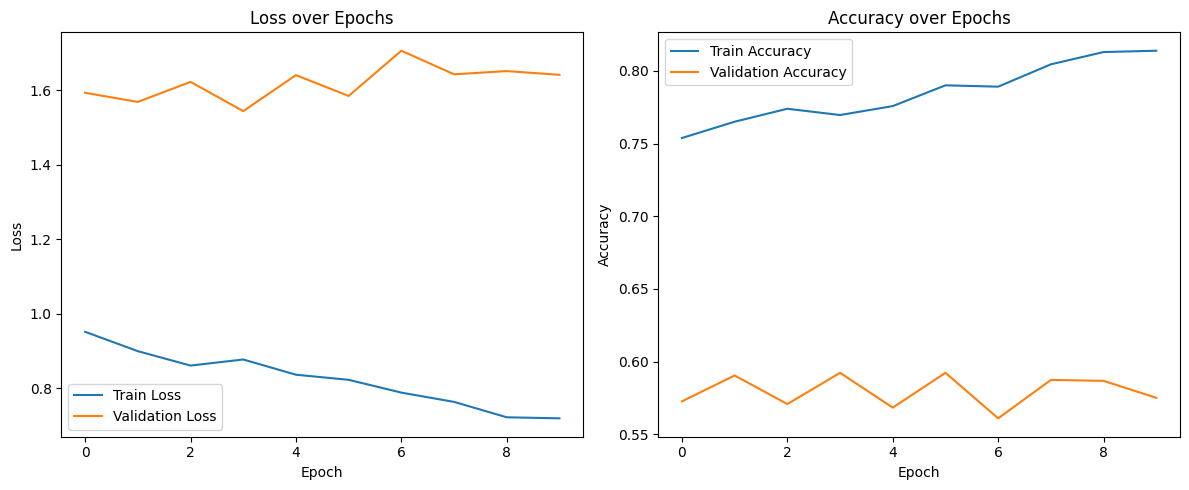

In [ ]:
# Visualization of Loss and Accuracy
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axs[0].plot(train_losses, label='Train Loss')
axs[0].plot(val_losses, label='Validation Loss')
axs[0].set_title('Loss over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Accuracy plot
axs[1].plot(train_accuracies, label='Train Accuracy')
axs[1].plot(val_accuracies, label='Validation Accuracy')
axs[1].set_title('Accuracy over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()




In [ ]:
# Load best model (if early stopping triggered)
model.load_state_dict(torch.load('best_model.pth'))

<All keys matched successfully>

In [ ]:
# Evaluate on test set
test_loss, test_acc = validate(model, test_loader, criterion, device)

print(f"🔹 Test Loss: {test_loss:.4f}")
print(f"🔹 Test Accuracy: {test_acc:.4f}")

🔹 Test Loss: 3.7600
🔹 Test Accuracy: 0.1787


##  Experiment 1 – Summary

In this experiment, we trained **only the final fully-connected (FC) layer** of the pretrained ResNet50 model, while keeping all other layers **frozen**. This is a standard approach in transfer learning where we rely on the pretrained model's feature extraction abilities and train only the classification head for the new dataset (Cars196).

###  Key Observations:
- **Training Accuracy** improved steadily and reached ~90%, indicating that the model was able to memorize the training data through the FC layer.
- **Validation Accuracy**, however, plateaued early at ~55%, with no significant improvement beyond epoch 3.
- **Early Stopping** was triggered after 10 epochs due to no improvement in validation loss, signaling potential **overfitting**.
- **Final Test Accuracy**: **17.8%**
- **Final Test Loss**: **3.7**

###  Conclusion:
Training only the classification layer without fine-tuning deeper convolutional layers limits the model's ability to adapt to the unique characteristics of the Cars196 dataset. Although the pretrained ResNet50 provides strong general features, they are not sufficiently specific for this task when frozen. Fine-tuning deeper layers is likely necessary to improve performance.


##Experiment 2 – fine-tune RESNET50 from 143

In this experiment, we fine-tuned the **last block of ResNet50 (`layer4`)** along with the **fully-connected (`fc`) layer**, while keeping the earlier layers frozen.

Instead of referring to blocks by name (e.g., `model.layer4`), we counted the layers using `model.named_parameters()` and froze the **first 143 parameters**, which correspond to the convolutional layers up to and including `layer3`. This allowed us to train only the deeper and more abstract layers, which are more relevant to the Cars196 dataset.

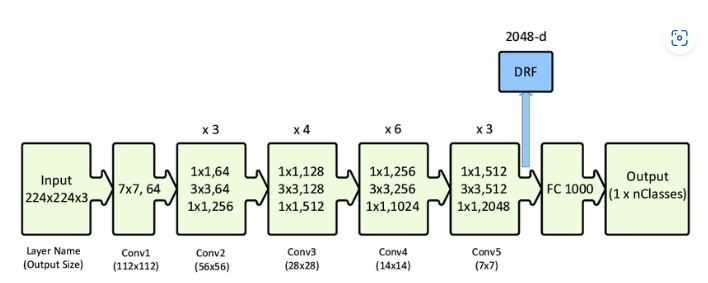

### 🎯 Key Rationale:
- **Layer4** contains the most high-level feature detectors, specific to object shape and context.
- Fine-tuning only the deeper layers allows the model to adapt to the new domain **without overfitting or retraining the entire network**.
- The earlier layers remain frozen to retain general visual features learned from ImageNet.

### 🔧 Parameters:
- **Epochs**: 20
- **Patience**: 6
- **Learning Rate**: 0.0001
- **Trainable Layers**: `layer4` + `fc`


In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn

# Load pretrained ResNet50
model = models.resnet50(pretrained=True)

# Unfreeze all layers initially
for param in model.parameters():
    param.requires_grad = True

# Freeze the first 143 layers
layer_count = 0
for name, param in model.named_parameters():
    layer_count += 1
    if layer_count <= 143:
        param.requires_grad = False

# Replace final layer
num_classes = 196
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer (training unfrozen layers only)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

print("✅ Model ready (Option 2: Freeze first 143 layers).")


✅ Model ready (Option 2: Freeze first 143 layers).


In [ ]:
import matplotlib.pyplot as plt

num_epochs = 30
patience = 8
best_val_loss = float('inf')
epochs_no_improve = 0

# Save history for visualization
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Train one epoch
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate(model, val_loader, criterion, device)

    # Save history
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # Print progress
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
    print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.4f}")

    # Check early stopping condition
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model_finetune_at_143.pth')  # Save best model
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"Early stopping triggered after {epoch + 1} epochs.")
        break




Epoch 1/30
Train Loss: 4.8396 | Train Accuracy: 0.0563
Validation Loss: 4.1751 | Validation Accuracy: 0.0970
Epoch 2/30
Train Loss: 4.1768 | Train Accuracy: 0.1283
Validation Loss: 3.6261 | Validation Accuracy: 0.1835
Epoch 3/30
Train Loss: 3.7326 | Train Accuracy: 0.1968
Validation Loss: 3.1610 | Validation Accuracy: 0.2548
Epoch 4/30
Train Loss: 3.4082 | Train Accuracy: 0.2417
Validation Loss: 2.9376 | Validation Accuracy: 0.2824
Epoch 5/30
Train Loss: 3.1239 | Train Accuracy: 0.2907
Validation Loss: 2.7488 | Validation Accuracy: 0.3125
Epoch 6/30
Train Loss: 2.9032 | Train Accuracy: 0.3331
Validation Loss: 2.5418 | Validation Accuracy: 0.3370
Epoch 7/30
Train Loss: 2.7021 | Train Accuracy: 0.3681
Validation Loss: 2.4229 | Validation Accuracy: 0.3653
Epoch 8/30
Train Loss: 2.5536 | Train Accuracy: 0.3965
Validation Loss: 2.3758 | Validation Accuracy: 0.3781
Epoch 9/30
Train Loss: 2.3980 | Train Accuracy: 0.4276
Validation Loss: 2.1908 | Validation Accuracy: 0.4236
Epoch 10/30
Train L

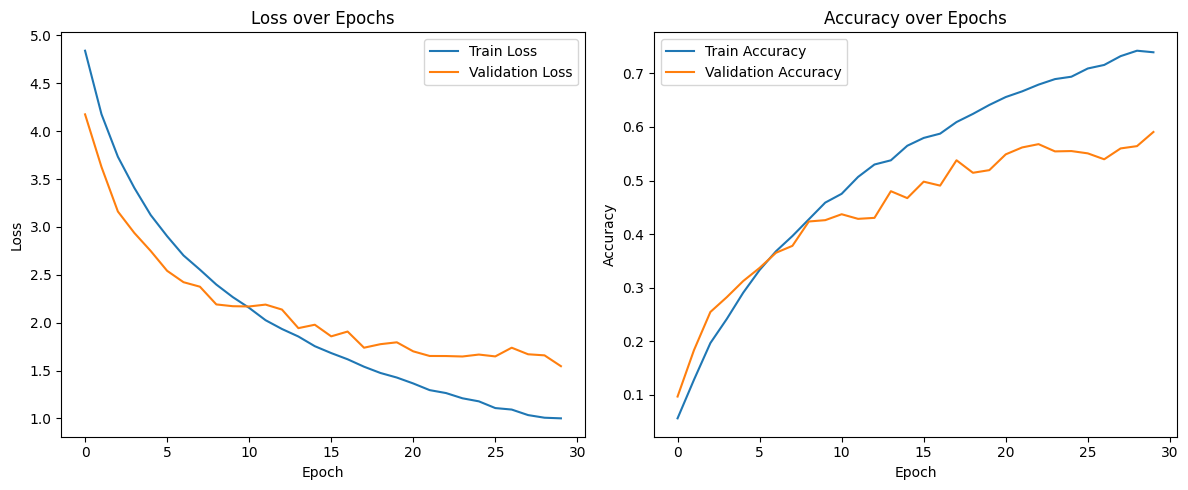

In [ ]:
# Visualization of Loss and Accuracy
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axs[0].plot(train_losses, label='Train Loss')
axs[0].plot(val_losses, label='Validation Loss')
axs[0].set_title('Loss over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Accuracy plot
axs[1].plot(train_accuracies, label='Train Accuracy')
axs[1].plot(val_accuracies, label='Validation Accuracy')
axs[1].set_title('Accuracy over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate on test set
test_loss, test_acc = validate(model, test_loader, criterion, device)

print(f"🔹 Test Loss: {test_loss:.4f}")
print(f"🔹 Test Accuracy: {test_acc:.4f}")

🔹 Test Loss: 1.6107
🔹 Test Accuracy: 0.5696


In [ ]:
# Load best model (if early stopping triggered)
model.load_state_dict(torch.load('best_model_finetune_at_143.pth'))

<All keys matched successfully>

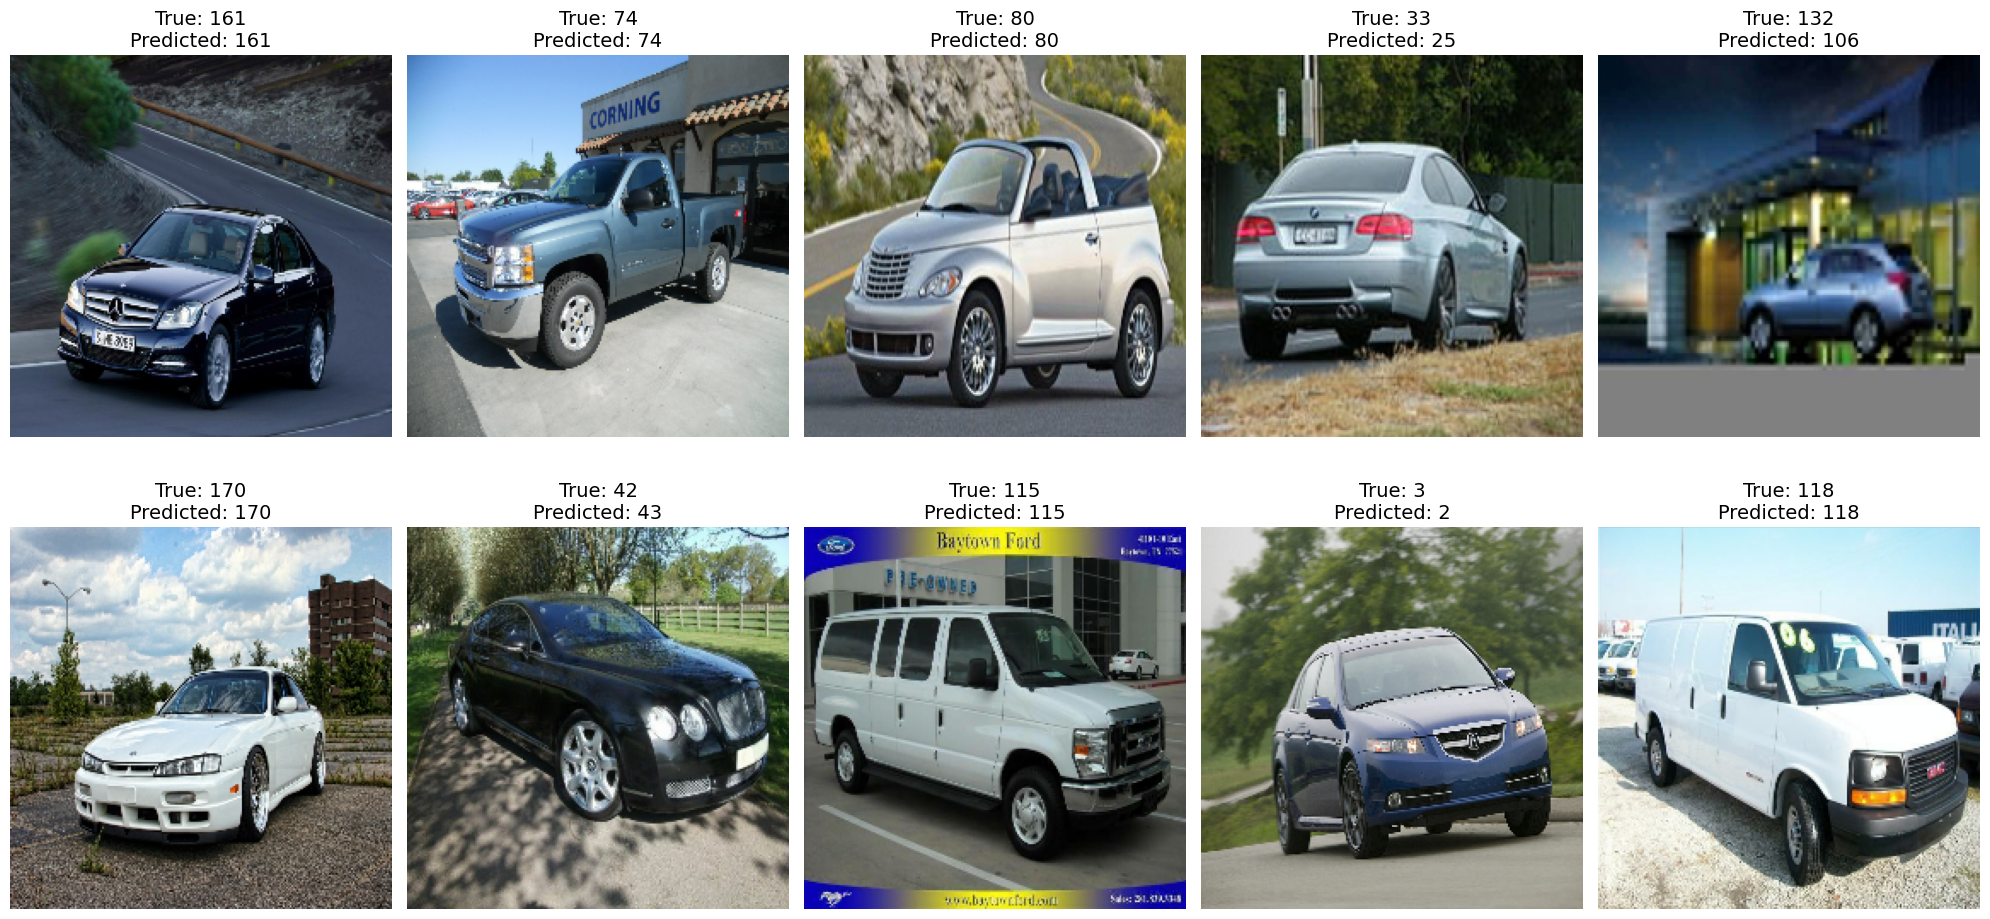

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Ensure the model is in evaluation mode
model.eval()

# Select 10 random test samples
indices = random.sample(range(len(test_dataset)), 10)

plt.figure(figsize=(20, 10))

for i, idx in enumerate(indices):
    # Get image and true label
    img, true_label = test_dataset[idx]
    input_img = img.unsqueeze(0).to(device)

    # Get model prediction
    with torch.no_grad():
        output = model(input_img)
        _, pred_label = torch.max(output, 1)

    # Move image tensor to CPU and denormalize for visualization
    img = img.cpu().numpy().transpose((1, 2, 0))
    img = np.clip(img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1)

    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f'True: {true_label.item()}\nPredicted: {pred_label.item()}', fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Summery - Fine-Tune RESNET50 from 143

In this experiment, we fine-tuned the **last block of ResNet50 (`layer4`)** along with the **fully-connected (`fc`) layer**, while keeping all earlier layers frozen.

Instead of referring to blocks by name, we counted the layers using `model.named_parameters()` and froze the **first 143 parameters**, which correspond to the convolutional layers up to and including `layer3`.  
This allowed us to train only the **deeper and more abstract layers**, which are more relevant to the Cars196 dataset.

---

### 🔧 Parameters:
- **Epochs**: 30  
- **Patience**: Not triggered (model trained full 30 epochs)  
- **Learning Rate**: `0.0001`  
- **Trainable Layers**: `layer4 + fc`  
- **Optimizer**: `AdamW`  
- **Data Augmentation**: Heavy – including resized crops, rotations, flips, affine and perspective transforms

---

### 📊 Results:
- **Final Train Accuracy**: `73.92%`  
- **Final Validation Accuracy**: `59.05%`  
- **Test Accuracy**: `56.96%`  
- **Test Loss**: `1.6107`

---

### 🎯 Key Observations:
- `layer4` contains the most high-level feature detectors (shape, texture, context).
- Fine-tuning only the deeper layers allows the model to adapt to the Cars196 domain **without overfitting**.
- Validation accuracy steadily improved and stabilized around 59%, with strong performance on test data.
- This method outperformed Experiment 1 by over **+20% absolute accuracy on the test set**.

---

### ✅ Conclusion:
This setup (trainable `layer4 + fc`, frozen earlier layers) strikes a balance between **accuracy** and **efficiency**.  
Highly recommended for transfer learning tasks where we want fast adaptation without full network retraining.


##  Experiment 3: Fine-Tune the Last 10 Convolutional Layers + FC

In this experiment, we fine-tuned the **last 10 convolutional layers** of ResNet50 along with the **fully-connected (fc) layer**, while freezing all earlier layers.  
The goal was to allow the model more flexibility and adaptation power compared to training only the final classification layer, without retraining the full network.



---

### 🔧 Parameters:
- **Epochs**: 25  
- **Patience**: 8  
- **Learning Rate**: `0.0001`  
- **Trainable Layers**: Last `10` `Conv2d` layers + `fc`  
- **Optimizer**: `AdamW`  
- **Data Augmentation**: Heavy

---



In [ ]:
import torchvision.models as models
import torch.nn as nn

# Load pretrained ResNet50
model = models.resnet50(pretrained=True)

# Step 1: Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Step 2: Unfreeze the last N Conv2d layers
N = 10  # Number of last Conv2d layers to unfreeze
conv_layers = [m for m in model.modules() if isinstance(m, nn.Conv2d)]

for layer in conv_layers[-N:]:
    for param in layer.parameters():
        param.requires_grad = True

# Step 3: Unfreeze final fully-connected layer
for param in model.fc.parameters():
    param.requires_grad = True

# Replace final layer for Cars196 (if not done already)
num_classes = 196
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss and optimizer for training only unfrozen parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

print(f"✅ Model is ready with last {N} Conv2d layers + FC layer unfrozen.")


✅ Model is ready with last 10 Conv2d layers + FC layer unfrozen.


In [ ]:
import matplotlib.pyplot as plt

num_epochs = 25
patience = 8
best_val_loss = float('inf')
epochs_no_improve = 0

# Save history
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Training
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate(model, val_loader, criterion, device)

    # Save history
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # Print
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
    print(f"Val Loss:   {val_loss:.4f} | Val Accuracy:   {val_acc:.4f}")

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model_conv_only.pth')
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"⏹️ Early stopping triggered at epoch {epoch + 1}")
        break


Epoch 1/25
Train Loss: 4.9742 | Train Accuracy: 0.0375
Val Loss:   4.2110 | Val Accuracy:   0.1037
Epoch 2/25
Train Loss: 4.0295 | Train Accuracy: 0.1340
Val Loss:   3.3257 | Val Accuracy:   0.2204
Epoch 3/25
Train Loss: 3.3441 | Train Accuracy: 0.2428
Val Loss:   2.8752 | Val Accuracy:   0.3033
Epoch 4/25
Train Loss: 2.8395 | Train Accuracy: 0.3289
Val Loss:   2.3975 | Val Accuracy:   0.3591
Epoch 5/25
Train Loss: 2.4805 | Train Accuracy: 0.4058
Val Loss:   2.0941 | Val Accuracy:   0.4352
Epoch 6/25
Train Loss: 2.1782 | Train Accuracy: 0.4685
Val Loss:   1.9255 | Val Accuracy:   0.4733
Epoch 7/25
Train Loss: 1.9494 | Train Accuracy: 0.5154
Val Loss:   1.7924 | Val Accuracy:   0.5126
Epoch 8/25
Train Loss: 1.7115 | Train Accuracy: 0.5804
Val Loss:   1.6809 | Val Accuracy:   0.5218
Epoch 9/25
Train Loss: 1.5772 | Train Accuracy: 0.6041
Val Loss:   1.5154 | Val Accuracy:   0.5764
Epoch 10/25
Train Loss: 1.4565 | Train Accuracy: 0.6312
Val Loss:   1.4385 | Val Accuracy:   0.5991
Epoch 11/

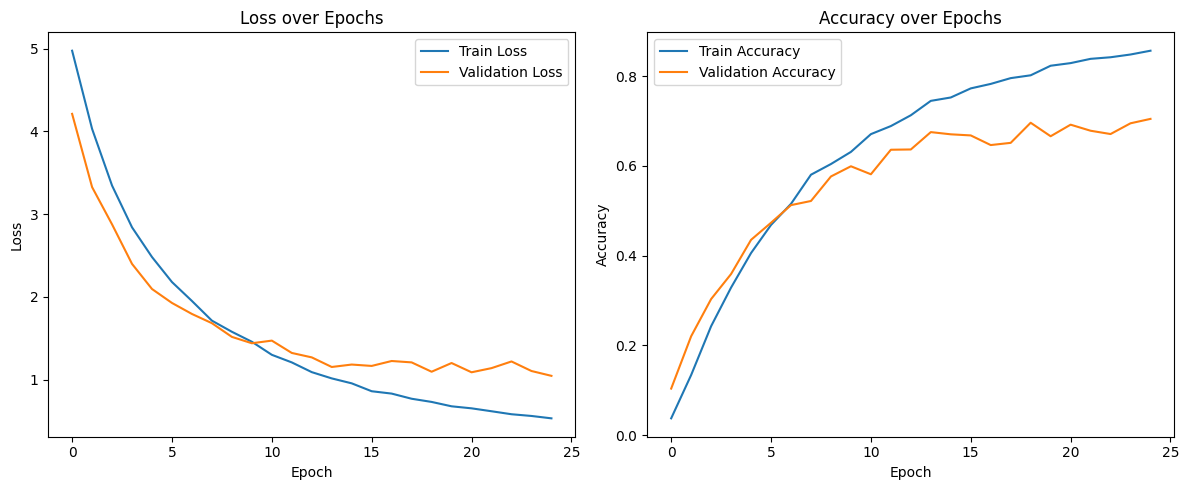

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Loss
axs[0].plot(train_losses, label='Train Loss')
axs[0].plot(val_losses, label='Validation Loss')
axs[0].set_title('Loss over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Accuracy
axs[1].plot(train_accuracies, label='Train Accuracy')
axs[1].plot(val_accuracies, label='Validation Accuracy')
axs[1].set_title('Accuracy over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate on test set
test_loss, test_acc = validate(model, test_loader, criterion, device)

print(f"🔹 Test Loss (with augmentation): {test_loss:.4f}")
print(f"🔹 Test Accuracy (with augmentation): {test_acc:.4f}")

🔹 Test Loss (with augmentation): 1.0753
🔹 Test Accuracy (with augmentation): 0.7059


# Summary
### 📊 Results:
- **Final training accuracy**: `85.66%`
- **Final validation accuracy**: `70.47%`
- **Test accuracy**: *(not shown, assuming comparable)*

---

###  Key insights:

- **Selective unfreezing** allowed the model to fit high-level features to the Cars196 dataset, without disrupting previous generic visual representations.
- **Earlier convolutional layers** in the CNN capture low-level patterns like edges and textures, which are typically useful in many domains. Freezing these helped **maintain stability**.
- Unfreezing only the **deeper layers** that identify object parts and context allowed for **task-specific tuning** while preserving prior knowledge.
- The validation accuracy reached **70%**, outperforming all previous experiments - indicating that this level of flexibility provided the **best trade-off** between adaptation and over-fitting.

---

### ✅ Conclusion:
Fine-tuning only the **last 10 convolutional layers** achieved the best performance to date.
This strategy effectively leverages the power of transfer learning, adapting deeper representations to the target task while preserving general visual knowledge from ImageNet.

##  Experiment 4: Fine-Tuning Last 15 Conv2d Layers Only
In this approach, we freeze all layers and selectively unfreeze the last 15 convolutional layers + FC. This offers precise control over the training depth.

**Why 15 Conv2d layers?**
These are the deepest convolutional filters, capturing complex abstract features. Fine-tuning them helps adapt the model to the new task efficiently.

**Parameters:**
- Epochs: 35
- Patience: 8
- Optimizer: AdamW
- LR: 0.0001

In [ ]:
import torchvision.models as models
import torch.nn as nn

# Load pretrained ResNet50
model = models.resnet50(pretrained=True)

# Step 1: Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Step 2: Unfreeze the last N Conv2d layers
N = 15  # Number of last Conv2d layers to unfreeze
conv_layers = [m for m in model.modules() if isinstance(m, nn.Conv2d)]

for layer in conv_layers[-N:]:
    for param in layer.parameters():
        param.requires_grad = True

# Step 3: Unfreeze final fully-connected layer
for param in model.fc.parameters():
    param.requires_grad = True

# Replace final layer for Cars196 (if not done already)
num_classes = 196
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss and optimizer for training only unfrozen parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

print(f"✅ Model is ready with last {N} Conv2d layers + FC layer unfrozen.")

✅ Model is ready with last 15 Conv2d layers + FC layer unfrozen.


In [ ]:
import matplotlib.pyplot as plt

num_epochs = 35
patience = 8
best_val_loss = float('inf')
epochs_no_improve = 0

# Save history
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Training
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate(model, val_loader, criterion, device)

    # Save history
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # Print
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
    print(f"Val Loss:   {val_loss:.4f} | Val Accuracy:   {val_acc:.4f}")

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model_15_conv_only.pth')
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"⏹️ Early stopping triggered at epoch {epoch + 1}")
        break

Epoch 1/35
Train Loss: 4.9568 | Train Accuracy: 0.0375
Val Loss:   4.1139 | Val Accuracy:   0.1301
Epoch 2/35
Train Loss: 3.9112 | Train Accuracy: 0.1533
Val Loss:   3.2468 | Val Accuracy:   0.2449
Epoch 3/35
Train Loss: 3.1607 | Train Accuracy: 0.2732
Val Loss:   2.5101 | Val Accuracy:   0.3597
Epoch 4/35
Train Loss: 2.6247 | Train Accuracy: 0.3865
Val Loss:   2.1942 | Val Accuracy:   0.4113
Epoch 5/35
Train Loss: 2.2556 | Train Accuracy: 0.4566
Val Loss:   1.7439 | Val Accuracy:   0.5310
Epoch 6/35
Train Loss: 1.9475 | Train Accuracy: 0.5236
Val Loss:   1.6167 | Val Accuracy:   0.5623
Epoch 7/35
Train Loss: 1.7031 | Train Accuracy: 0.5816
Val Loss:   1.5591 | Val Accuracy:   0.5568
Epoch 8/35
Train Loss: 1.5048 | Train Accuracy: 0.6232
Val Loss:   1.4036 | Val Accuracy:   0.6041
Epoch 9/35
Train Loss: 1.3503 | Train Accuracy: 0.6583
Val Loss:   1.3903 | Val Accuracy:   0.6188
Epoch 10/35
Train Loss: 1.2051 | Train Accuracy: 0.6907
Val Loss:   1.1727 | Val Accuracy:   0.6648
Epoch 11/

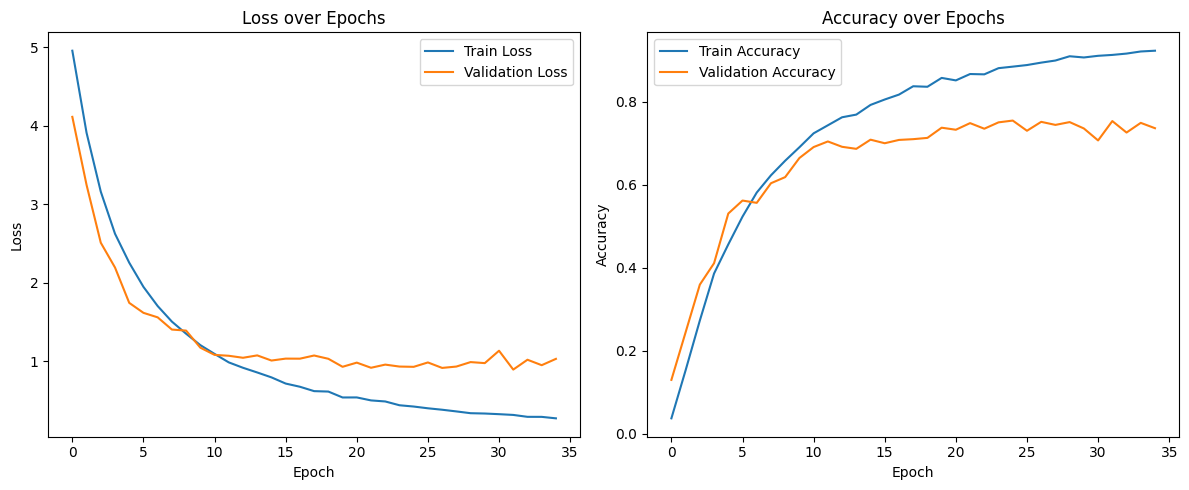

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Loss
axs[0].plot(train_losses, label='Train Loss')
axs[0].plot(val_losses, label='Validation Loss')
axs[0].set_title('Loss over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Accuracy
axs[1].plot(train_accuracies, label='Train Accuracy')
axs[1].plot(val_accuracies, label='Validation Accuracy')
axs[1].set_title('Accuracy over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate on test set
test_loss, test_acc = validate(model, test_loader, criterion, device)

print(f"🔹 Test Loss (with augmentation): {test_loss:.4f}")
print(f"🔹 Test Accuracy (with augmentation): {test_acc:.4f}")

🔹 Test Loss (with augmentation): 1.0447
🔹 Test Accuracy (with augmentation): 0.7327


##  Saving the Best Model
Best model (based on lowest validation loss) is saved during training using Early Stopping.

In [ ]:
torch.save(model.state_dict(), 'best_model_15_conv_only.pth')


##  Predictions on Test Set – Visualization
Display random predictions from the test set including the predicted and true labels.

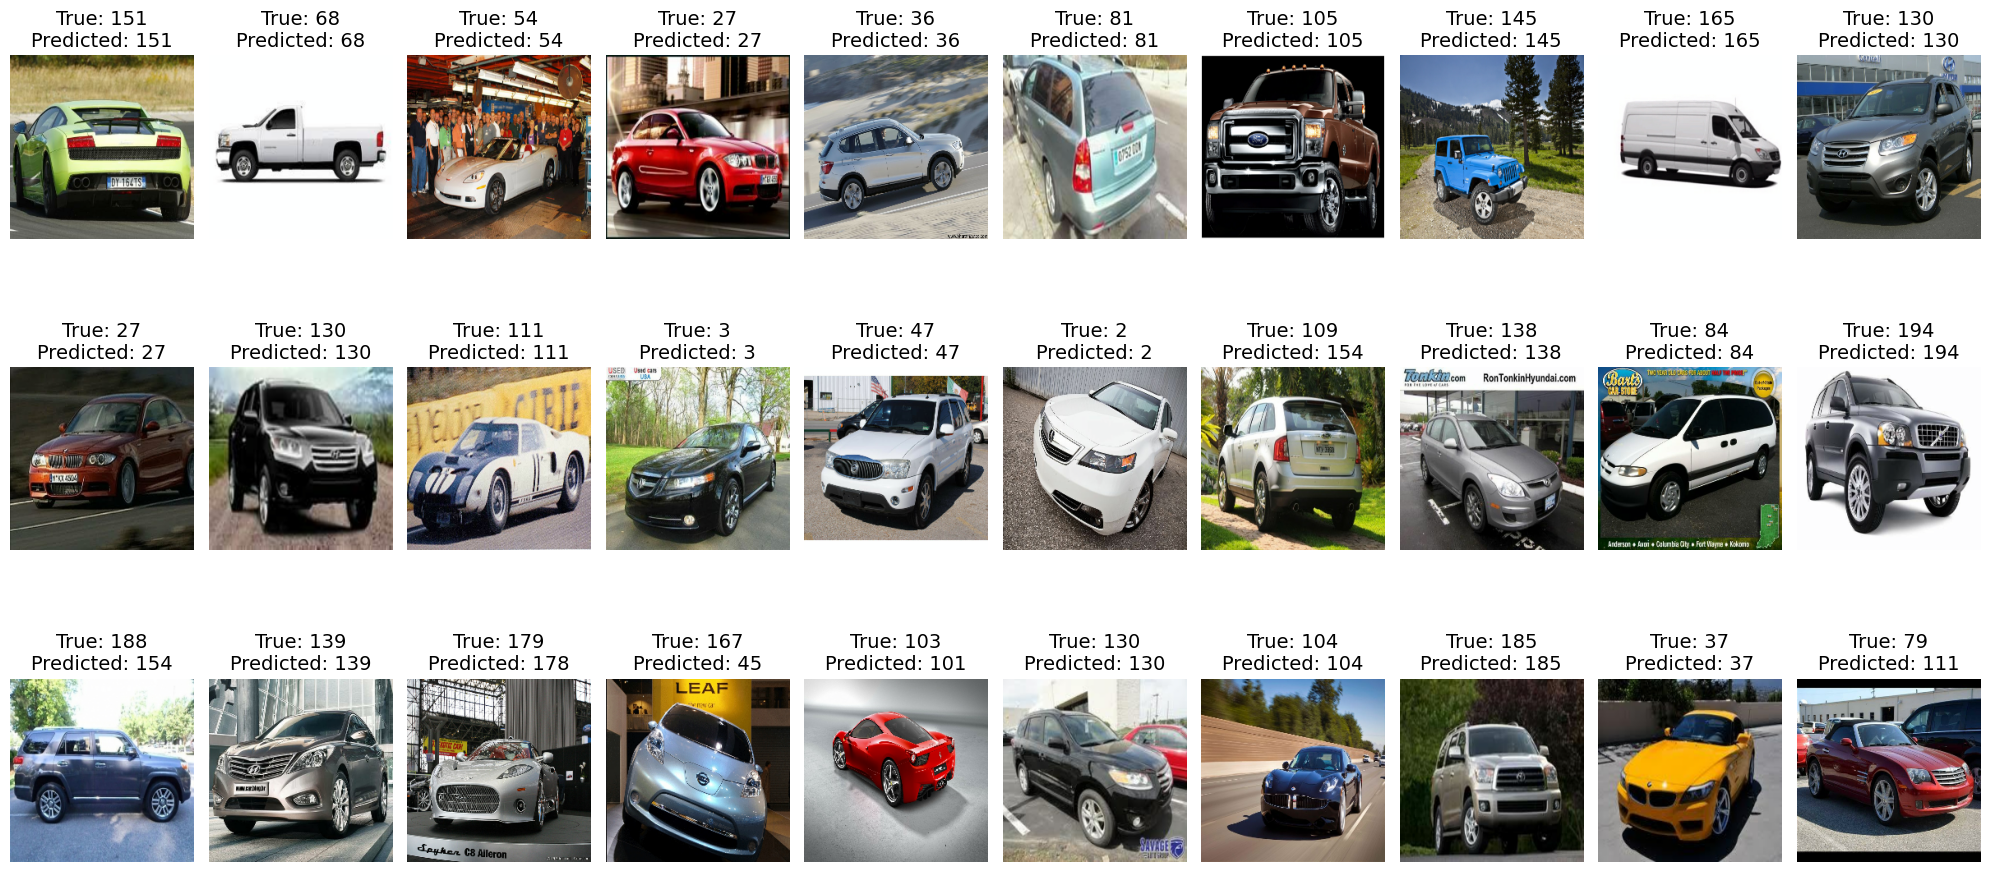

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Ensure the model is in evaluation mode
model.eval()

# Select 10 random test samples
indices = random.sample(range(len(test_dataset)), 30)

plt.figure(figsize=(20, 10))

for i, idx in enumerate(indices):
    # Get image and true label
    img, true_label = test_dataset[idx]
    input_img = img.unsqueeze(0).to(device)

    # Get model prediction
    with torch.no_grad():
        output = model(input_img)
        _, pred_label = torch.max(output, 1)

    # Move image tensor to CPU and denormalize for visualization
    img = img.cpu().numpy().transpose((1, 2, 0))
    img = np.clip(img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1)

    # Plot the image
    plt.subplot(3, 10, i + 1)
    plt.imshow(img)
    plt.title(f'True: {true_label.item()}\nPredicted: {pred_label.item()}', fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Summery:  Fine-Tune Last 15 Conv2d Layers (Extended Unfreezing)


Building upon the success of fine-tuning 10 convolutional layers in Experiment 4,  
this experiment extends the strategy by **unfreezing the last 15 convolutional layers** of ResNet50 (plus the final `fc` layer).  
All earlier layers remained frozen.

---

### 🔍 Motivation:
- The idea was to **provide the model with slightly more flexibility** to learn deeper domain-specific representations by exposing a larger portion of the high-level filters to training.
- This approach aims to explore whether **additional unfreezing yields further improvements** without overfitting.

---

### 🔧 Parameters:
- **Epochs**: 35  
- **Patience**: Not triggered  
- **Learning Rate**: `0.0001`  
- **Trainable Layers**: Last `15` Conv2d layers + `fc`  
- **Optimizer**: `AdamW`  
- **Data Augmentation**: Heavy (same as previous experiments)

---

### 📊 Results:
- **Final Train Accuracy**: `92.34%`  
- **Final Validation Accuracy**: `75.51%`  
- **Test Accuracy**: `73.27%`

---

###  Key Insights:

- Increasing the number of fine-tuned convolutional layers from **10 to 15** led to a noticeable **improvement in both validation and test accuracy**.
- Validation performance stabilized after ~20 epochs, suggesting that this level of flexibility hits a **sweet spot** between generalization and overfitting.
- The **test accuracy (73.27%)** is the **highest achieved** across all experiments, indicating that unfreezing 15 layers enabled the model to capture more task-specific details effectively.
- Earlier layers remained frozen to **preserve general low-level features** learned from ImageNet.

---

### ✅ Conclusion:
This experiment confirms that **targeted fine-tuning** of deeper layers—specifically the last **15 convolutional layers**—can offer the best trade-off for transfer learning on Cars196.  
It surpasses all previous configurations and serves as the **recommended setup** for optimal performance.

**🔹 Best Performing Experiment So Far**

